<h2> Quantum Layers (qConv and qPool) </h2>

<h3> Imports </h3>

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

<h5> <i> Some links I used in making the programs: </i> </h5> 

https://qiskit.org/documentation/_modules/qiskit/circuit/quantumcircuit.html  
https://qiskit.org/documentation/stubs/qiskit.circuit.library.CU3Gate.html#qiskit-circuit-library-cu3gate

In [2]:
numOfInputs = 5
response = input("Would you like to change the default number of inputs of 5? (Y / N) ")
if (response == "Y" or response == "y"):
    numOfInputs = int(input("How many inputs are there? "))

Would you like to change the default number of inputs of 5? (Y / N) y
How many inputs are there? 7


In [3]:
import math
pi = math.pi

#numOfInputs = 5
default = pi/2 
params = {'theta' : [default for i in range(numOfInputs)], 
            'phi' : [default for i in range(numOfInputs)], 
            'lam' : [default for i in range(numOfInputs)]}
numOfLayers = 2
parameters = {}
for i in range(numOfLayers):
    parameters[i] = params

<h3> Quantum Convolutional Layer </h3>

Using Controlled-U3 Gates and params dictionary (defined above)

In [4]:
def qConvLayer(paramDict, shift, inputs):
    qConv = QuantumCircuit(inputs)
    for i in range(0+shift,inputs-1,2):
        index = int(i)
        if (i%2==shift):
            qConv.cu3(paramDict['theta'][index], paramDict['phi'][index], paramDict['lam'][index], 
                      control_qubit=index, target_qubit=index+1)
    return qConv

<h3> Initialization </h3> 

<ipython-input-4-8a2bc7434711>:6: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  qConv.cu3(paramDict['theta'][index], paramDict['phi'][index], paramDict['lam'][index],
<ipython-input-5-9344aa67cfbf>:9: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc + qConvLayer(params, 0, numOfInputs) + qConvLayer(params, 1, numOfInputs)
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


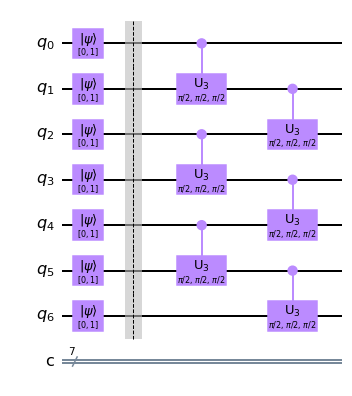

In [5]:
numOfOutputs = numOfInputs
qc = QuantumCircuit(numOfInputs,numOfOutputs)
initial_state = [0,1]

for i in range(numOfInputs):
    qc.initialize(initial_state, i) # Apply initialisation operation to the 0th qubit

qc.barrier()
qc = qc + qConvLayer(params, 0, numOfInputs) + qConvLayer(params, 1, numOfInputs)
qc.draw()

<h3> Quantum Pooling Layer </h3>

In [6]:
def qPoolLayer(inputs):
    qPool = QuantumCircuit(inputs,inputs)
    for i in range(inputs):
        j=i
        if (i%2==0):
            qPool.measure(i,j)
    return qPool

<ipython-input-7-649745cfe737>:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += qcm
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


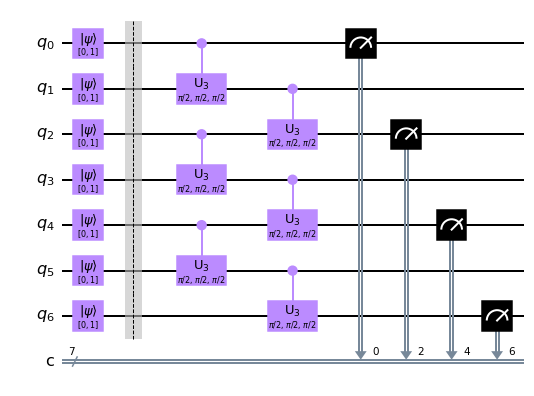

In [7]:
qcm = qPoolLayer(numOfInputs)
qc += qcm
qc.draw()

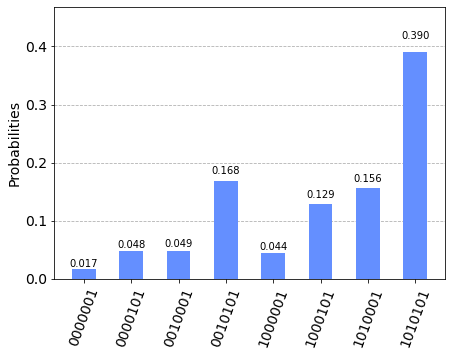

In [8]:
sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)